In [ ]:
import pandas as pd

df = pd.read_csv('movies_metadata.csv')

print(df.head())

# Print the list of column names
print("Columns in the dataset:")
print(df.columns.tolist())

FileNotFoundError: [Errno 2] No such file or directory: 'movies_metadata.csv'

In [ ]:
maindf = df[['overview', 'genres', 'title']]
print(maindf.head)

<bound method NDFrame.head of                                                 overview  \
0      Led by Woody, Andy's toys live happily in his ...   
1      When siblings Judy and Peter discover an encha...   
2      A family wedding reignites the ancient feud be...   
3      Cheated on, mistreated and stepped on, the wom...   
4      Just when George Banks has recovered from his ...   
...                                                  ...   
45461        Rising and falling between a man and woman.   
45462  An artist struggles to finish his work while a...   
45463  When one of her hits goes wrong, a professiona...   
45464  In a small town live two brothers, one a minis...   
45465  50 years after decriminalisation of homosexual...   

                                                  genres  \
0      [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1      [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2      [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3      [{

In [ ]:
print("\nDataset information:")
print(maindf.info())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  44512 non-null  object
 1   genres    45466 non-null  object
 2   title     45460 non-null  object
dtypes: object(3)
memory usage: 1.0+ MB
None


In [ ]:
# Drop rows with missing values in either 'overview' or 'title'
df_cleaned = maindf.dropna(subset=['overview', 'title', 'genres'])

# Verify the result by checking the DataFrame information
print("After dropping rows with missing 'overview' or 'title':")
print(df_cleaned.info())

After dropping rows with missing 'overview' or 'title':
<class 'pandas.core.frame.DataFrame'>
Index: 44506 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  44506 non-null  object
 1   genres    44506 non-null  object
 2   title     44506 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB
None


In [ ]:
df_train = df_cleaned[['overview', 'genres', 'title']]
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 44506 entries, 0 to 45465
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  44506 non-null  object
 1   genres    44506 non-null  object
 2   title     44506 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB
None


Two datasets,

df_cleaned = 'overview', 'title', 'genres'

df_train = 'overview', 'title'



* START THE RUN FROM HERE AFTER LOADING THE DATA SET*

In [ ]:
import pandas as pd

data = pd.read_csv('train_movies_metadata.csv')

In [ ]:
import pandas as pd

evaldata = pd.read_csv('cleaned_movies_metadata.csv')

tokenizer : LAMA2


In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
import pandas as pd
import torch
import numpy as np
from transformers import LlamaForCausalLM, LlamaTokenizer, Trainer, TrainingArguments
from peft import get_peft_model, LoraConfig, TaskType
from datasets import Dataset

# Load data
train_data = pd.read_csv('/content/train_movies_metadata.csv')
eval_data = pd.read_csv('/content/train_movies_metadata.csv')

# Quick check
print(train_data.head())


                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                         title  
0                    Toy Story  
1                      Jumanji  
2             Grumpier Old Men  
3            Waiting to Exhale  
4  Father of the Bride Part II  


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer

# Load data
data = pd.read_csv('train_movies_metadata.csv')
data = data[['overview', 'genres']].dropna()
data['genres'] = data['genres'].apply(lambda x: x.split('|'))

# Subsample data if needed (e.g., 10k examples)
data = data.sample(n=10000, random_state=42)

print(data.head())

# Create and fit the MultiLabelBinarizer
mlb = MultiLabelBinarizer()
genre_labels = mlb.fit_transform(data['genres'])

# Now you can split data and convert to Hugging Face Dataset...


                                                overview  \
17964  An unusual ghost story set on the Peruvian sea...   
5055   Professor Ayres discovers a secret in an ancie...   
40104  A couple hires a professional digger (undergro...   
7671   To reconcile with his girlfriend, a bookish co...   
24172  Charlie's investigation of a phony psychic dur...   

                                                  genres  
17964  [[{'id': 18, 'name': 'Drama'}, {'id': 10749, '...  
5055                    [[{'id': 27, 'name': 'Horror'}]]  
40104                   [[{'id': 27, 'name': 'Horror'}]]  
7671   [[{'id': 18, 'name': 'Drama'}, {'id': 35, 'nam...  
24172  [[{'id': 9648, 'name': 'Mystery'}, {'id': 53, ...  


In [ ]:
import pandas as pd
import ast

# Load the CSV file
data = pd.read_csv('train_movies_metadata.csv')

def clean_genres(genre_str):
    """
    Convert a genre string into a list of genre names.
    Handles two cases:
      1. A pipe-separated string (e.g., "Action|Comedy|Drama")
      2. A string representation of a list of dictionaries (e.g.,
         "[{'id': 28, 'name': 'Action'}, {'id': 35, 'name': 'Comedy'}]")
    """
    if pd.isna(genre_str):
        return []
    # Case 1: Pipe-separated string
    if isinstance(genre_str, str) and '|' in genre_str:
        return [g.strip() for g in genre_str.split('|') if g.strip() != '']
    # Case 2: String representation of a list of dictionaries
    try:
        parsed = ast.literal_eval(genre_str)
        if isinstance(parsed, list):
            names = []
            for item in parsed:
                if isinstance(item, dict) and 'name' in item:
                    names.append(item['name'])
                elif isinstance(item, str):
                    names.append(item)
            return names
    except Exception:
        pass
    return []

# Create a new column 'cleaned_genres'
data['cleaned_genres'] = data['genres'].apply(clean_genres)

# Optionally, drop rows with no genres after cleaning
data = data[data['cleaned_genres'].map(lambda x: len(x)) > 0]

# Display the first 10 rows to verify the cleaning process
print(data[['overview', 'cleaned_genres']].head(10))
print("Number of movies after cleaning:", len(data))


                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   
5  Obsessive master thief, Neil McCauley leads a ...   
6  An ugly duckling having undergone a remarkable...   
7  A mischievous young boy, Tom Sawyer, witnesses...   
8  International action superstar Jean Claude Van...   
9  James Bond must unmask the mysterious head of ...   

                       cleaned_genres  
0         [Animation, Comedy, Family]  
1        [Adventure, Fantasy, Family]  
2                   [Romance, Comedy]  
3            [Comedy, Drama, Romance]  
4                            [Comedy]  
5    [Action, Crime, Drama, Thriller]  
6                   [Comedy, Romance]  
7  [Action, Adventure, Drama, Family]  
8       [Action, Advent

In [ ]:
import pandas as pd
import numpy as np
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
import torch
from datasets import Dataset
from sklearn.metrics import f1_score

# --- Data Loading & Cleaning ---
data = pd.read_csv('train_movies_metadata.csv')
data = data[['overview', 'genres']].dropna()

def clean_genres(genre_str):
    """
    Cleans a genre string by handling:
    1. Pipe-separated strings (e.g., "Action|Comedy|Drama")
    2. String representations of lists of dictionaries (e.g., "[{'id': 28, 'name': 'Action'}, ...]")
    Returns a list of genre names.
    """
    if pd.isna(genre_str):
        return []
    if isinstance(genre_str, str) and '|' in genre_str:
        return [g.strip() for g in genre_str.split('|') if g.strip()]
    try:
        parsed = ast.literal_eval(genre_str)
        if isinstance(parsed, list):
            names = []
            for item in parsed:
                if isinstance(item, dict) and 'name' in item:
                    names.append(item['name'])
                elif isinstance(item, str):
                    names.append(item)
            return names
    except Exception:
        pass
    return []

data['cleaned_genres'] = data['genres'].apply(clean_genres)
data = data[data['cleaned_genres'].map(lambda x: len(x)) > 0]
print(data[['overview', 'cleaned_genres']].head(10))
print("Number of movies after cleaning:", len(data))

# --- Label Encoding ---
mlb = MultiLabelBinarizer()
genre_labels = mlb.fit_transform(data['cleaned_genres']).astype(np.float32)

# --- Train/Validation Split ---
train_texts, val_texts, train_labels, val_labels = train_test_split(
    data['overview'].tolist(), genre_labels, test_size=0.2, random_state=42
)
train_dataset = Dataset.from_dict({'text': train_texts, 'labels': train_labels})
val_dataset = Dataset.from_dict({'text': val_texts, 'labels': val_labels})

# --- Model & Tokenizer Setup ---
# Switched to a larger model for improved performance
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=len(mlb.classes_),
    problem_type="multi_label_classification"
)

# --- Tokenization ---
def tokenize(batch):
    return tokenizer(batch['text'], padding="max_length", truncation=True, max_length=256)

train_dataset = train_dataset.map(tokenize, batched=True)
val_dataset = val_dataset.map(tokenize, batched=True)

train_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])
val_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'labels'])

# --- Compute pos_weight for Weighted Loss ---
train_labels_np = np.array(train_dataset["labels"])  # shape: (num_samples, num_labels)
positive_counts = np.sum(train_labels_np, axis=0)
negative_counts = train_labels_np.shape[0] - positive_counts
pos_weight = torch.tensor(negative_counts / (positive_counts + 1e-5), dtype=torch.float32)
pos_weight = torch.clamp(pos_weight, max=1000.0)
print("pos_weight (clipped):", pos_weight)

# --- Custom Trainer with Weighted Loss ---
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.logits
        loss_fct = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight.to(model.device))
        loss = loss_fct(logits, labels)
        return (loss, outputs) if return_outputs else loss

# --- Training Arguments ---
training_args = TrainingArguments(
    output_dir='./movie-genre-model',
    eval_strategy='epoch',
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    weight_decay=0.01,
    logging_steps=10,
    save_total_limit=2,
    fp16=True,
    report_to='none'
)

trainer = CustomTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# --- Training ---
trainer.train()

# --- Evaluation with Dynamic Thresholding ---
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Get raw predictions from the validation set
pred_output = trainer.predict(val_dataset)
logits = pred_output.predictions
true_labels = np.array(val_dataset["labels"])

# Function to evaluate at a given threshold
def evaluate_threshold(threshold):
    preds = (torch.sigmoid(torch.tensor(logits)) > threshold).numpy().astype(np.int32)
    acc = accuracy_score(true_labels, preds)
    precision = precision_score(true_labels, preds, average="micro", zero_division=0)
    recall = recall_score(true_labels, preds, average="micro", zero_division=0)
    f1 = f1_score(true_labels, preds, average="micro", zero_division=0)
    return acc, precision, recall, f1

thresholds = np.linspace(0.1, 0.8, 8)
best_threshold = 0.5
best_f1 = 0.0

print("Threshold\tAccuracy\tPrecision\tRecall\t\tF1 Score")
for thresh in thresholds:
    acc, precision, recall, f1 = evaluate_threshold(thresh)
    print(f"{thresh:.2f}\t\t{acc:.4f}\t\t{precision:.4f}\t\t{recall:.4f}\t\t{f1:.4f}")
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = thresh

print("\nOptimal Threshold:", best_threshold)
acc, precision, recall, f1 = evaluate_threshold(best_threshold)
print("Evaluation with optimal threshold", best_threshold)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


                                            overview  \
0  Led by Woody, Andy's toys live happily in his ...   
1  When siblings Judy and Peter discover an encha...   
2  A family wedding reignites the ancient feud be...   
3  Cheated on, mistreated and stepped on, the wom...   
4  Just when George Banks has recovered from his ...   
5  Obsessive master thief, Neil McCauley leads a ...   
6  An ugly duckling having undergone a remarkable...   
7  A mischievous young boy, Tom Sawyer, witnesses...   
8  International action superstar Jean Claude Van...   
9  James Bond must unmask the mysterious head of ...   

                       cleaned_genres  
0         [Animation, Comedy, Family]  
1        [Adventure, Fantasy, Family]  
2                   [Romance, Comedy]  
3            [Comedy, Drama, Romance]  
4                            [Comedy]  
5    [Action, Crime, Drama, Thriller]  
6                   [Comedy, Romance]  
7  [Action, Adventure, Drama, Family]  
8       [Action, Advent

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/33856 [00:00<?, ? examples/s]

Map:   0%|          | 0/8465 [00:00<?, ? examples/s]

pos_weight (clipped): tensor([ 5.3795, 11.3652, 20.9417,  2.3134,  8.7963,  9.9072,  1.1124, 14.5947,
        17.3800, 25.6164, 29.6667,  8.2100, 25.5537, 16.3532,  5.3176, 13.1008,
        54.0504,  4.5347, 31.0606, 39.6435])


Epoch,Training Loss,Validation Loss
1,0.745900,0.722825
2,0.626300,0.686445


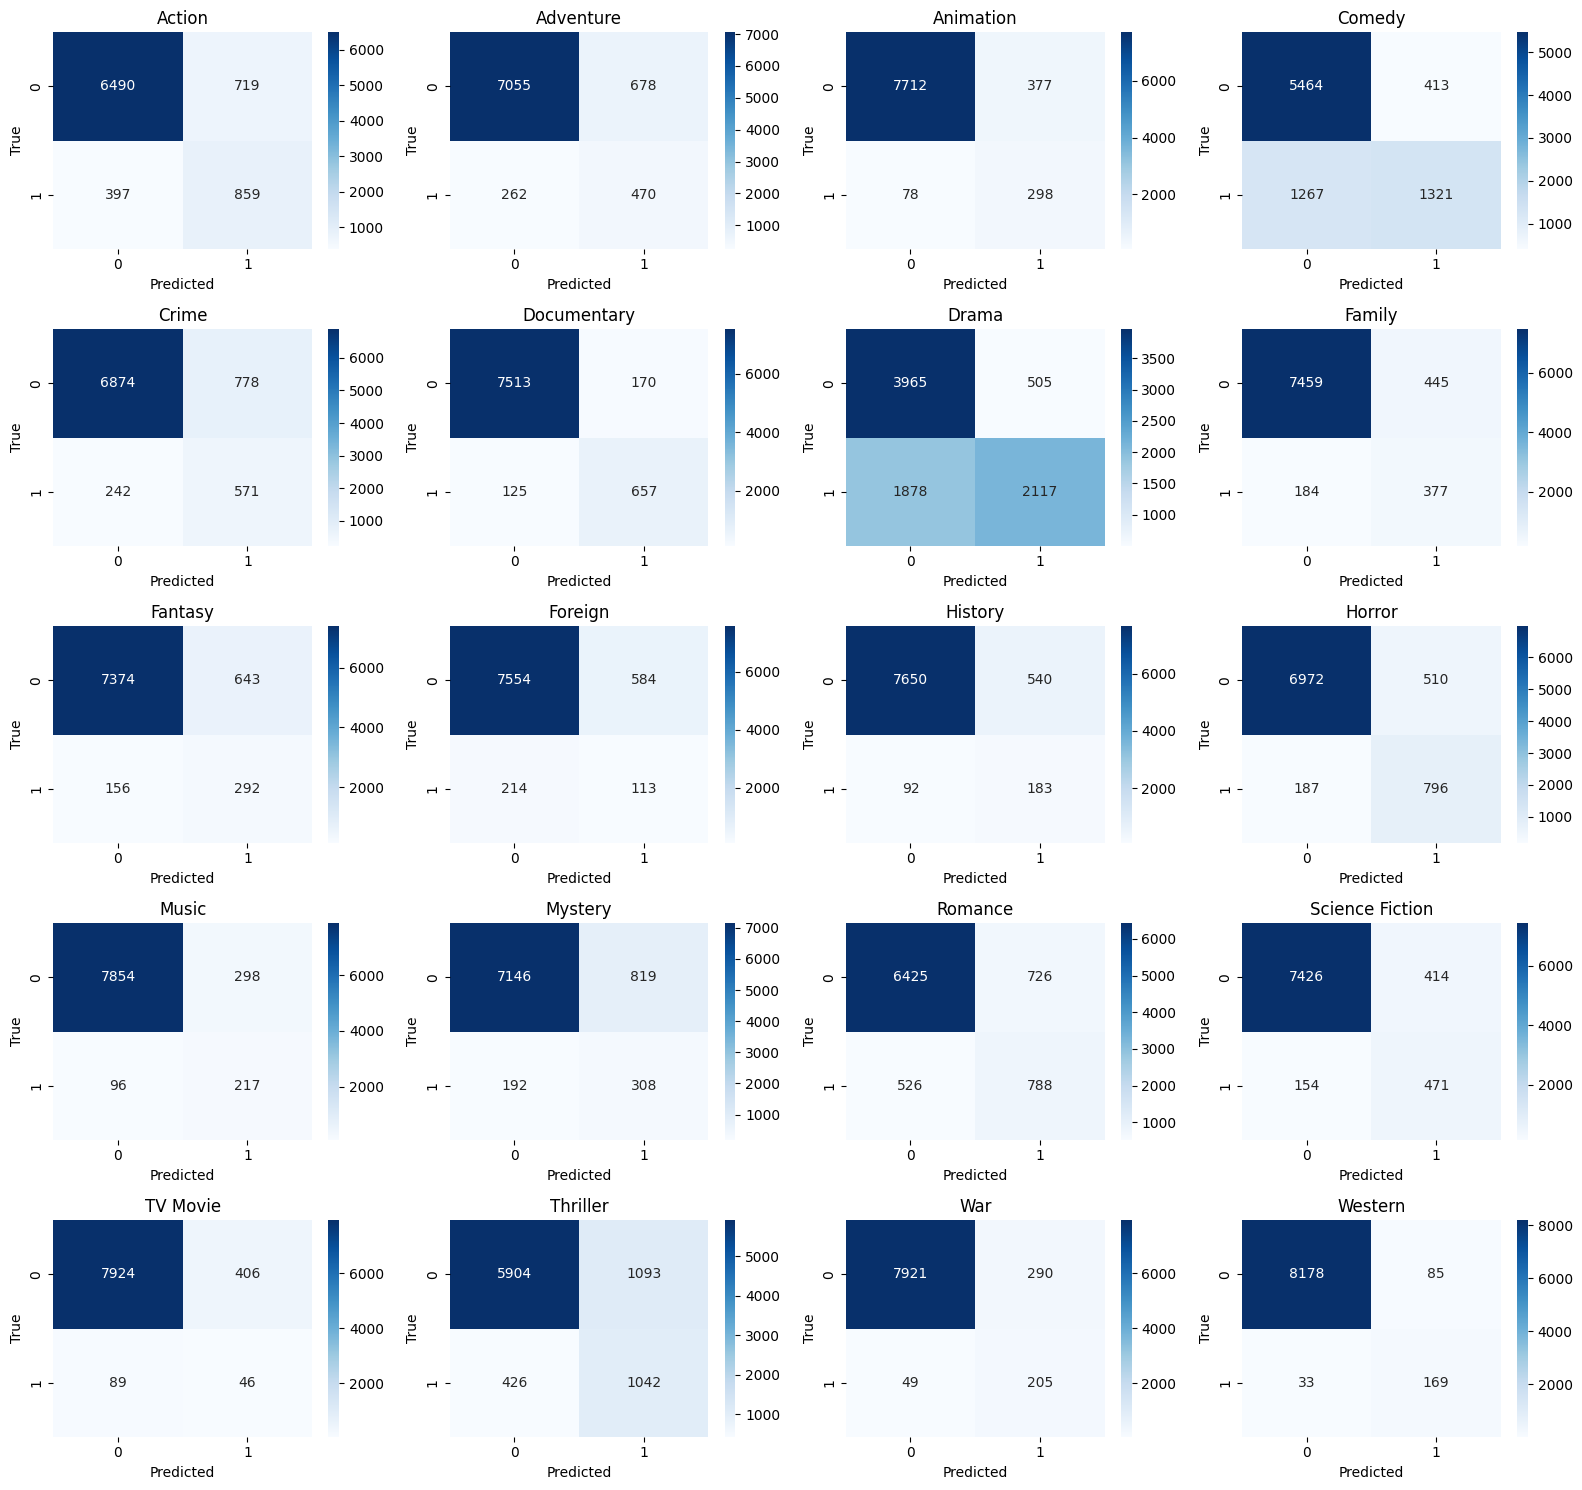

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

# Assume best_threshold and true_labels are defined from previous evaluation
# For example, using the optimal threshold:
best_threshold = 0.7  # from your evaluation above
preds_optimal = (torch.sigmoid(torch.tensor(logits)) > best_threshold).numpy().astype(np.int32)
true_labels = np.array(val_dataset["labels"])

# Compute a separate 2x2 confusion matrix for each label
mcm = multilabel_confusion_matrix(true_labels, preds_optimal)
num_labels = len(mlb.classes_)

# Plotting: if the number of labels is small, use a grid; otherwise, plot individually.
if num_labels <= 20:
    cols = 4
    rows = (num_labels // cols) + (num_labels % cols > 0)
    fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*3))
    axes = axes.flatten()
    for idx, cm in enumerate(mcm):
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
        axes[idx].set_title(mlb.classes_[idx])
        axes[idx].set_xlabel("Predicted")
        axes[idx].set_ylabel("True")
    # Turn off any extra subplots
    for ax in axes[num_labels:]:
        ax.axis('off')
    plt.tight_layout()
    plt.show()
else:
    # If there are many labels, plot one by one
    for idx, cm in enumerate(mcm):
        plt.figure(figsize=(4,3))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.title(f"Confusion Matrix for {mlb.classes_[idx]}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()


In [42]:
model.save_pretrained("./movie-genre-model")
tokenizer.save_pretrained("./movie-genre-model")


('./movie-genre-model/tokenizer_config.json',
 './movie-genre-model/special_tokens_map.json',
 './movie-genre-model/vocab.txt',
 './movie-genre-model/added_tokens.json',
 './movie-genre-model/tokenizer.json')